# Exercises:
### 1. Clustering with the Iris Dataset
#### Using this lesson as a guide, perform clustering on the iris dataset.
   ##### - Choose features other than the ones used in the lesson.
   ##### - Visualize the results of your clustering.
   ##### - Use the elbow method to visually select a good value for k.
   ##### - Repeat the clustering, this time with 3 different features.

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

### 3. How does scaling impact the results of clustering?
- I dont see much effect
#### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# For statistical modeling
import scipy.stats as stats

import random

# To acquire MYSQL Data
import acquire
from env import username, password, host
from cluster_wrangle import scale_data, train_validate_test, wrangle_zillow, remove_outliers, rfe, rmse, pf
from cluster_wrangle import lasso_lars, glm, pf_test, value_viz, pred_act, no_error, test, vis, graph, split, n_error
import cluster_eval

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To avoid deprecation and other warnings
import warnings
warnings.filterwarnings('ignore')

# For modeling
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

from sklearn.cluster import KMeans

In [2]:
def scale(train, 
          validate, 
          test, 
          columns=[], return_scaler=False):
    '''
    Scales train, validate, test and returns scaled versions of each 
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # Make the scaler
    scaler = MinMaxScaler()
    # Fit it
    scaler.fit(train[columns])
    # Apply the scaler:
    train_scaled[columns] = pd.DataFrame(scaler.transform(train[columns]),
                                                  columns=train[columns].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns] = pd.DataFrame(scaler.transform(validate[columns]),
                                                  columns=validate[columns].columns.values).set_index([validate.index.values])
    
    test_scaled[columns] = pd.DataFrame(scaler.transform(test[columns]),
                                                 columns=test[columns].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


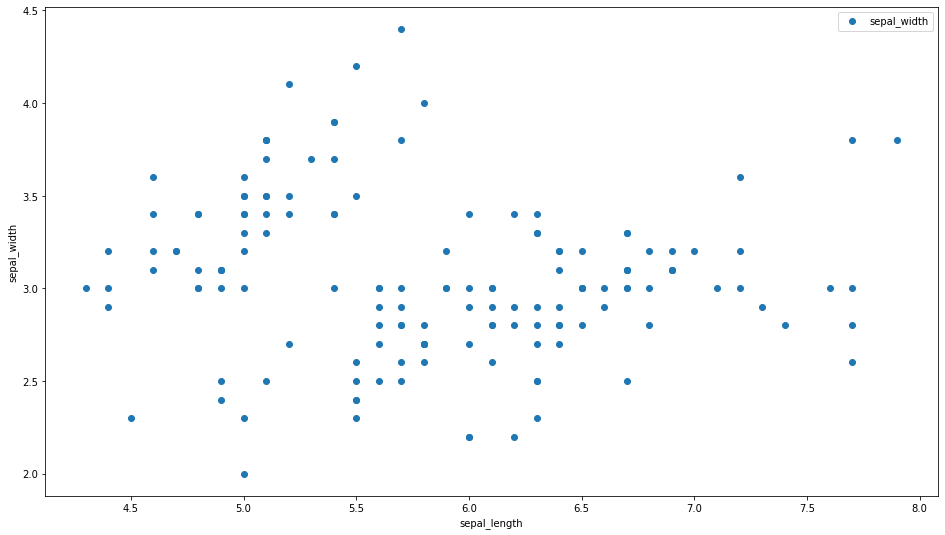

In [5]:
plt.figure(figsize=(16,9))
plt.scatter(data=df, x='sepal_length', y='sepal_width')
#plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

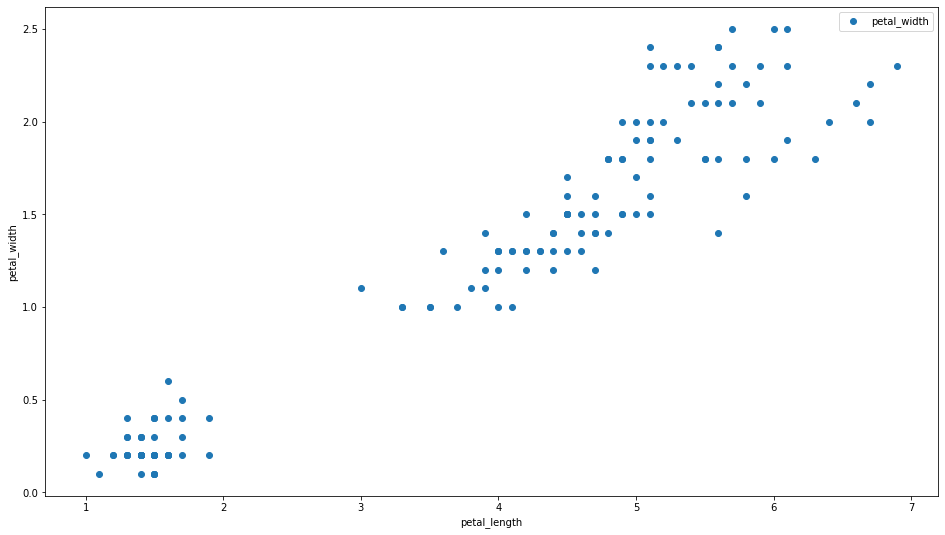

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(data=df, x='petal_length', y='petal_width')
#plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

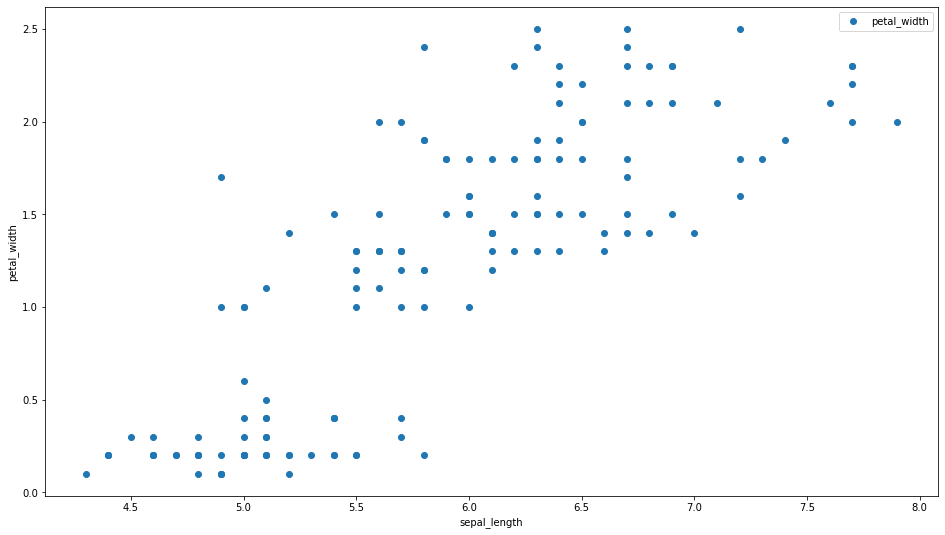

In [7]:
plt.figure(figsize=(16,9))
plt.scatter(data=df, x='sepal_length', y='petal_width')
#plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.show()

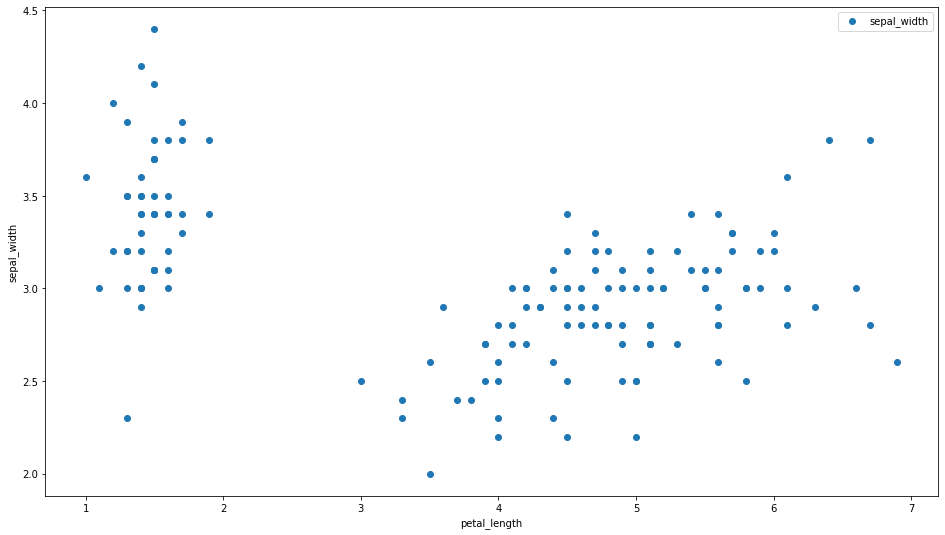

In [8]:
plt.figure(figsize=(16,9))
plt.scatter(data=df, x='petal_length', y='sepal_width')
#plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("petal_length")
plt.ylabel("sepal_width")
plt.show()

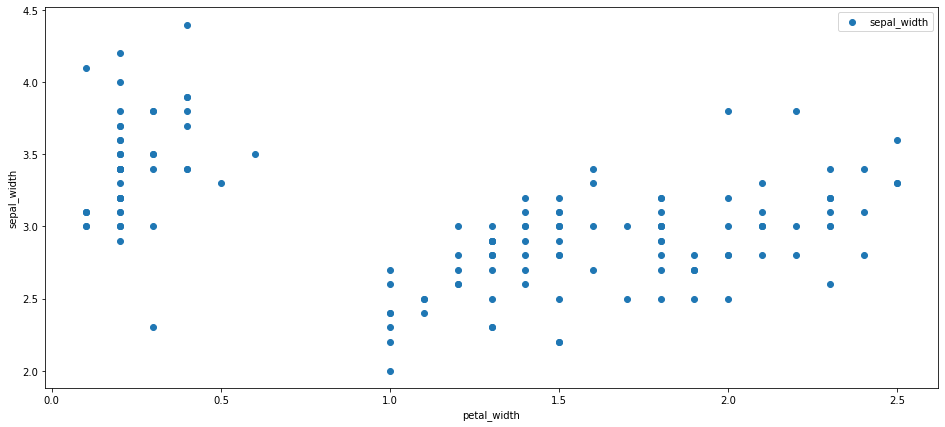

In [9]:
plt.figure(figsize=(16,7))
plt.scatter(data=df, x='petal_width', y='sepal_width')
#s=100
#plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

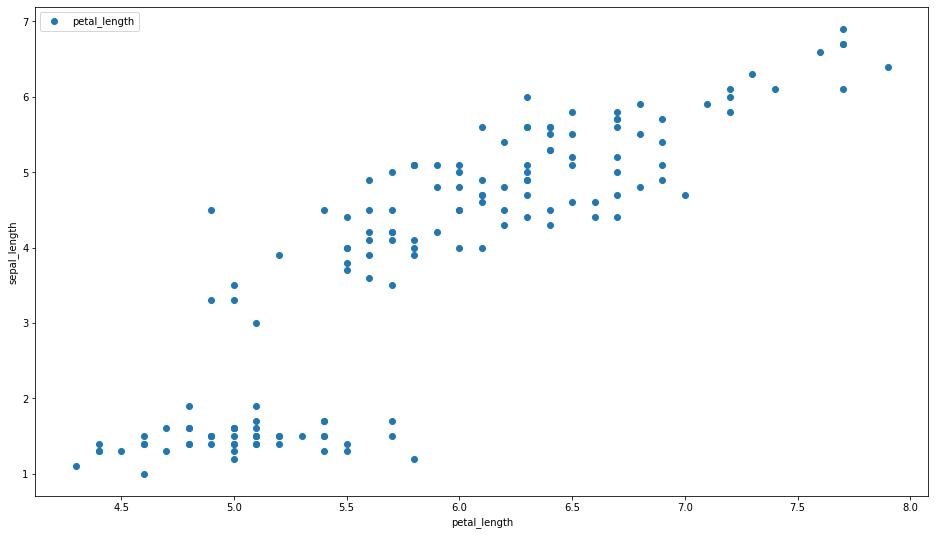

In [10]:
plt.figure(figsize=(16,9))
plt.scatter(data=df, x='sepal_length', y='petal_length')
#, s=100
#plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

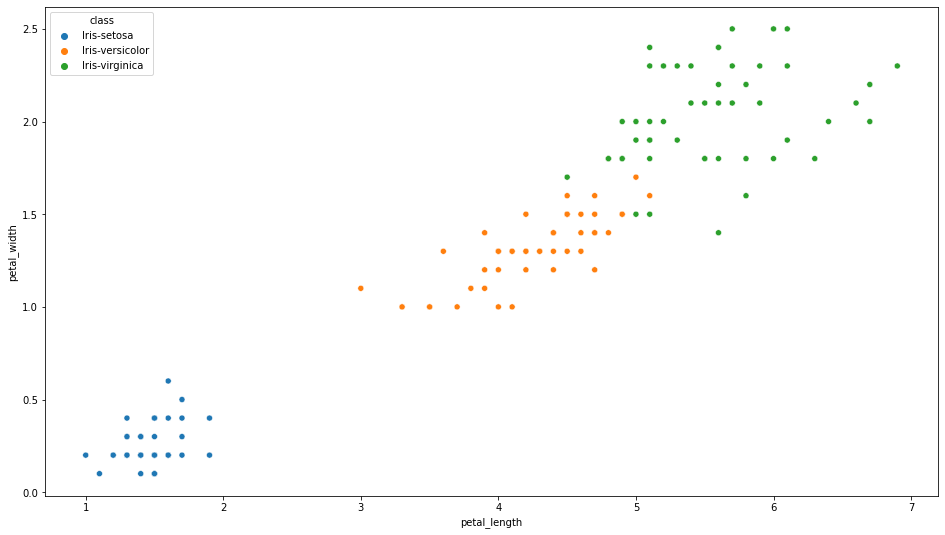

In [12]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='class')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [13]:
df.replace({'Iris-setosa':'1','Iris-versicolor':'2','Iris-virginica':'3'}, inplace=True)

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [15]:
train, validate, test = split(df)

     sepal_length  sepal_width  petal_length  petal_width class
0             5.1          3.5           1.4          0.2     1
1             4.9          3.0           1.4          0.2     1
2             4.7          3.2           1.3          0.2     1
3             4.6          3.1           1.5          0.2     1
4             5.0          3.6           1.4          0.2     1
..            ...          ...           ...          ...   ...
145           6.7          3.0           5.2          2.3     3
146           6.3          2.5           5.0          1.9     3
147           6.5          3.0           5.2          2.0     3
148           6.2          3.4           5.4          2.3     3
149           5.9          3.0           5.1          1.8     3

[150 rows x 5 columns] shape: (150, 5)
Train shape: (90, 5)
Validate shape: (30, 5)
Test shape: (30, 5)


In [16]:
train

,sepal_length,sepal_width,petal_length,petal_width,class
124,6.7,3.3,5.7,2.1,3
118,7.7,2.6,6.9,2.3,3
70,5.9,3.2,4.8,1.8,2
33,5.5,4.2,1.4,0.2,1
26,5.0,3.4,1.6,0.4,1
...,...,...,...,...,...
47,4.6,3.2,1.4,0.2,1
101,5.8,2.7,5.1,1.9,3
149,5.9,3.0,5.1,1.8,3
13,4.3,3.0,1.1,0.1,1


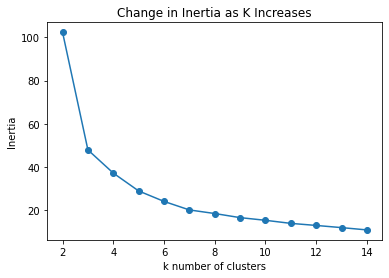

In [17]:
pd.Series(
    {k: KMeans(k).fit(train).inertia_ 
     for k in range(2,15)}).plot(marker='o')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K Increases')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train)
train['cluster'] = kmeans.predict(train)

In [19]:
train

,sepal_length,sepal_width,petal_length,petal_width,class,cluster
124,6.7,3.3,5.7,2.1,3,0
118,7.7,2.6,6.9,2.3,3,0
70,5.9,3.2,4.8,1.8,2,2
33,5.5,4.2,1.4,0.2,1,1
26,5.0,3.4,1.6,0.4,1,1
...,...,...,...,...,...,...
47,4.6,3.2,1.4,0.2,1,1
101,5.8,2.7,5.1,1.9,3,0
149,5.9,3.0,5.1,1.8,3,0
13,4.3,3.0,1.1,0.1,1,1


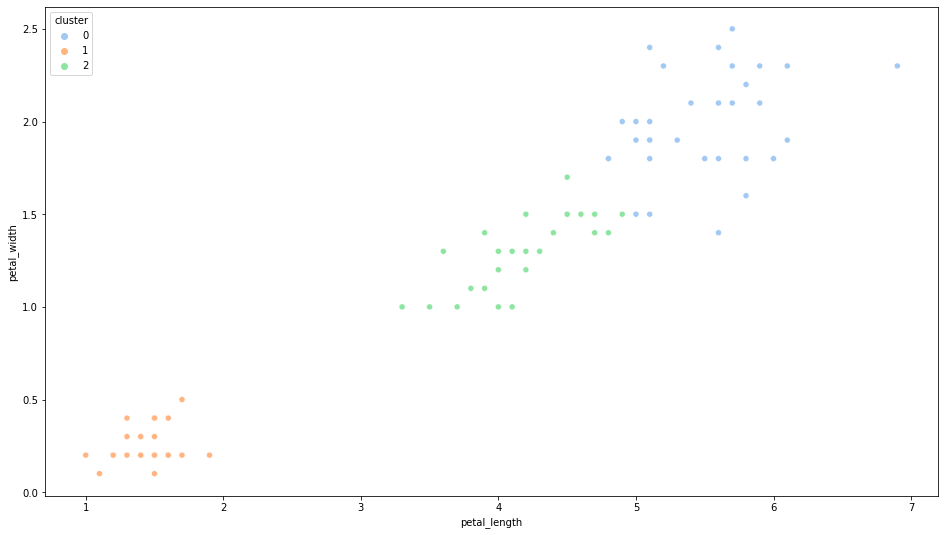

In [20]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=train, x='petal_length', y='petal_width', hue='cluster', palette='pastel')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

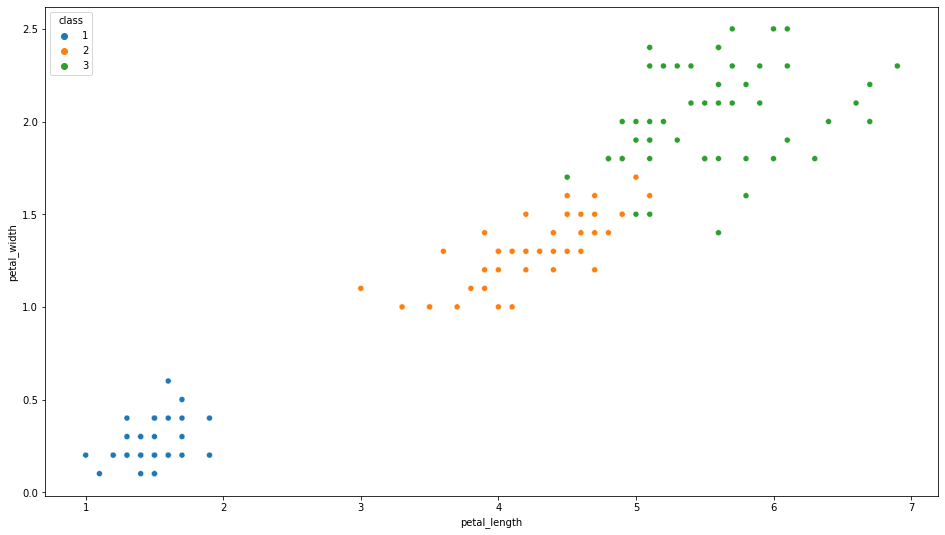

In [21]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='class')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [22]:
train[train.cluster == 2]

,sepal_length,sepal_width,petal_length,petal_width,class,cluster
70,5.9,3.2,4.8,1.8,2,2
68,6.2,2.2,4.5,1.5,2,2
53,5.5,2.3,4.0,1.3,2,2
67,5.8,2.7,4.1,1.0,2,2
66,5.6,3.0,4.5,1.5,2,2
62,6.0,2.2,4.0,1.0,2,2
94,5.6,2.7,4.2,1.3,2,2
57,4.9,2.4,3.3,1.0,2,2
95,5.7,3.0,4.2,1.2,2,2
81,5.5,2.4,3.7,1.0,2,2


In [23]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class',
       'cluster'],
      dtype='object')

In [24]:
train_scaled, validate_scaled, test_scaled = scale(train, validate, test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [52]:
train_scaled

,sepal_length,sepal_width,petal_length,petal_width,class,cluster
124,0.705882,0.500000,0.796610,0.833333,3,0
118,1.000000,0.181818,1.000000,0.916667,3,0
70,0.470588,0.454545,0.644068,0.708333,2,2
33,0.352941,0.909091,0.067797,0.041667,1,1
26,0.205882,0.545455,0.101695,0.125000,1,1
...,...,...,...,...,...,...
47,0.088235,0.454545,0.067797,0.041667,1,1
101,0.441176,0.227273,0.694915,0.750000,3,0
149,0.470588,0.363636,0.694915,0.708333,3,0
13,0.000000,0.363636,0.016949,0.000000,1,1


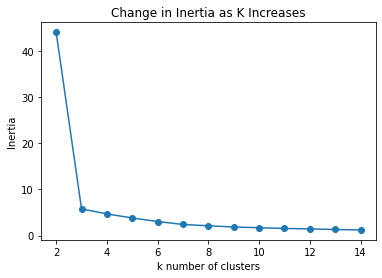

In [53]:
pd.Series(
    {k: KMeans(k).fit(train_scaled).inertia_ 
     for k in range(2,15)}).plot(marker='o')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K Increases')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_scaled)
train_scaled['cluster'] = kmeans.predict(train_scaled)

In [56]:
train_scaled

,sepal_length,sepal_width,petal_length,petal_width,class,cluster
124,0.705882,0.500000,0.796610,0.833333,3,1
118,1.000000,0.181818,1.000000,0.916667,3,1
70,0.470588,0.454545,0.644068,0.708333,2,0
33,0.352941,0.909091,0.067797,0.041667,1,2
26,0.205882,0.545455,0.101695,0.125000,1,2
...,...,...,...,...,...,...
47,0.088235,0.454545,0.067797,0.041667,1,2
101,0.441176,0.227273,0.694915,0.750000,3,1
149,0.470588,0.363636,0.694915,0.708333,3,1
13,0.000000,0.363636,0.016949,0.000000,1,2


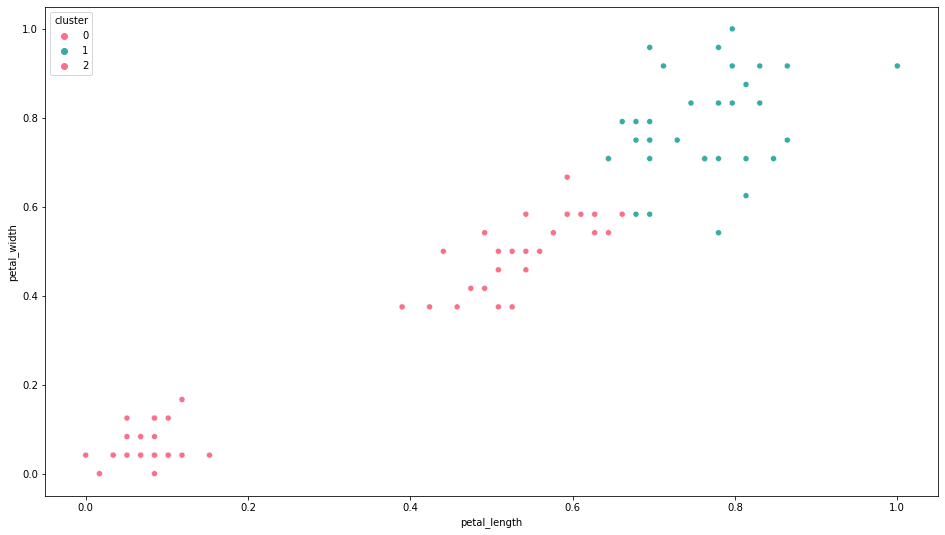

In [59]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=train_scaled, x='petal_length', y='petal_width', hue='cluster', palette='husl')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

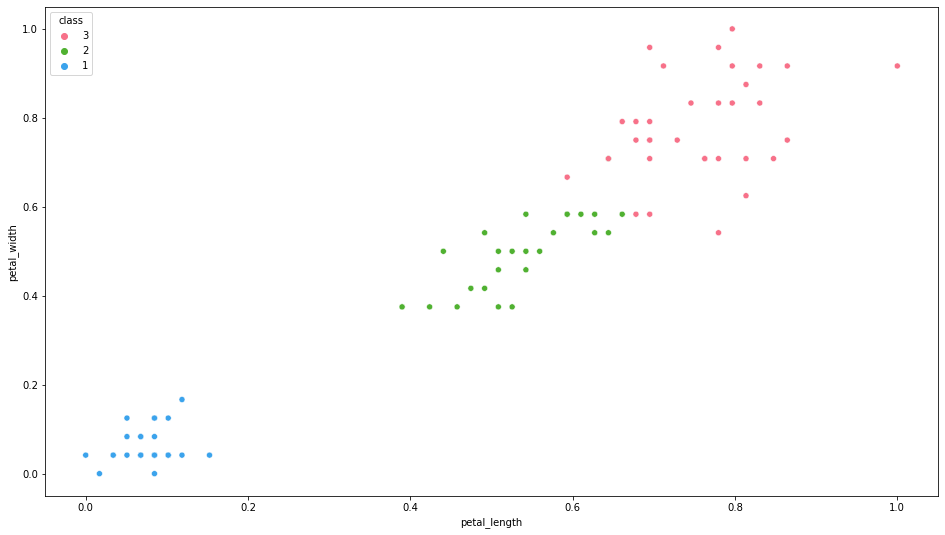

In [60]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=train_scaled, x='petal_length', y='petal_width', hue='class', palette='husl')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

---

## Bonus
#### a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
#### b) Visualize the data and guess the number and shape of the clusters.
#### c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
#### d) Repeat the step above but with scaled data.
#### c) Write down the takeaways from this exercise.

In [25]:
cd = pd.read_excel('cluster_data.csv.xlsx')
cd

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


In [26]:
cd.x.mean()

0.5084492735125001

In [27]:
cd.y.mean()

2.9732060093125035

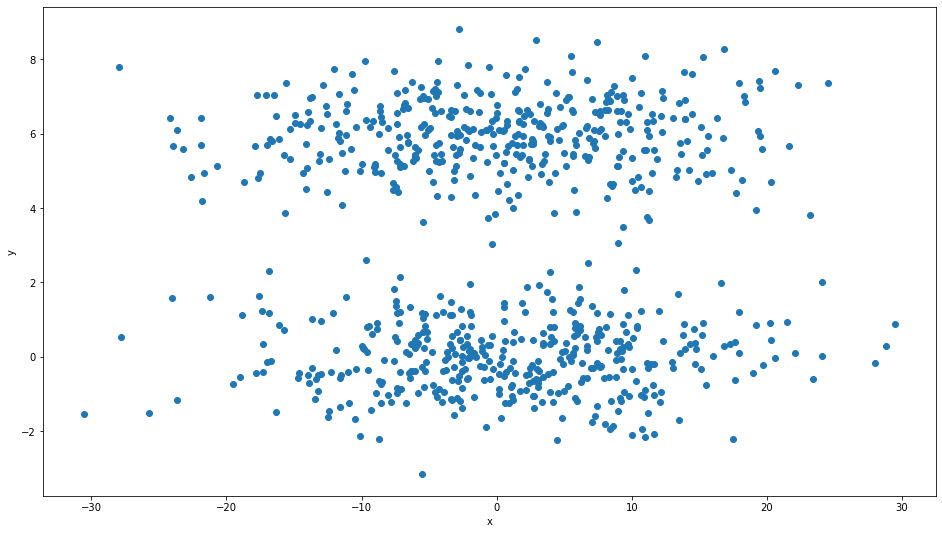

In [28]:
plt.figure(figsize=(16,9))
plt.scatter(data=cd, x='x', y='y')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### There looks like there are two clusters, separated around y=3

In [29]:
cd_train, cd_validate, cd_test = split(cd)

             x         y
0    -3.641747  0.121540
1    -7.620447  1.810897
2    -6.505373  0.068072
3     7.730963  0.585521
4    17.283668  0.344804
..         ...       ...
795   3.941363  5.807617
796   6.057122  6.010463
797   8.373651  4.641515
798  -2.058756  6.077125
799  11.039449  5.559096

[800 rows x 2 columns] shape: (800, 2)
Train shape: (480, 2)
Validate shape: (160, 2)
Test shape: (160, 2)


In [30]:
cd_train

,x,y
620,6.666922,7.451809
589,-12.551851,6.538911
143,-13.630346,1.006623
182,7.391275,0.419649
608,-3.362357,6.451850
...,...,...
548,-13.702256,6.974656
741,1.467309,5.438411
264,-1.992155,0.195861
38,7.382630,0.532887


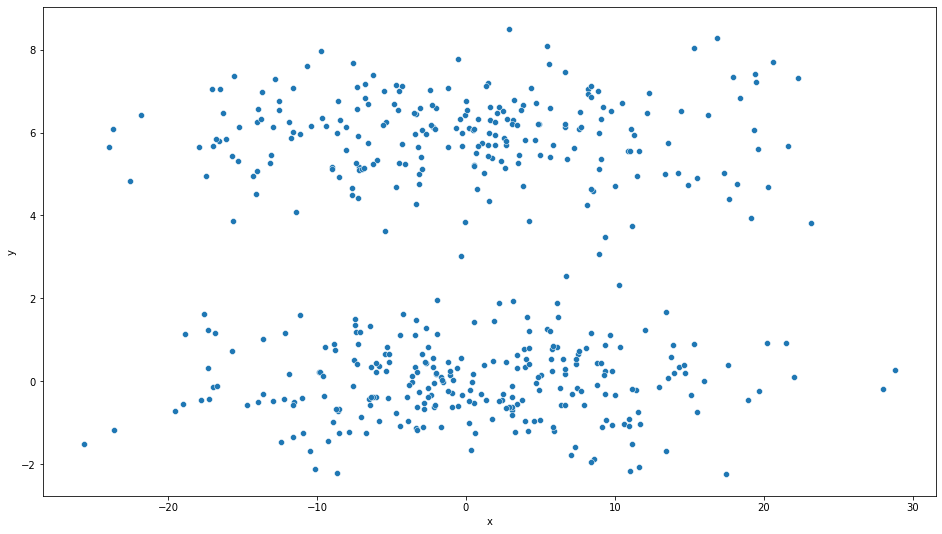

In [31]:
plt.figure(figsize=(16,9))
sns.scatterplot('x', 'y', data=cd_train, palette=("husl"))
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Train data looks similar

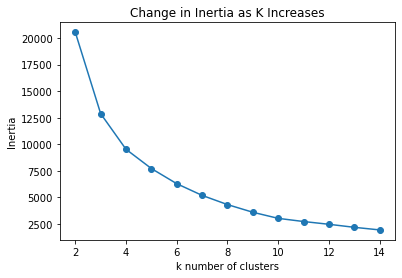

In [32]:
pd.Series(
    {k: KMeans(k).fit(cd_train).inertia_ 
     for k in range(2,15)}).plot(marker='o')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K Increases')
plt.show()

### 4 clusters seems to be more appropriate base on the change of inertia

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cd_train)
cd_train['cluster'] = kmeans.predict(cd_train)

In [34]:
kmeans.inertia_

9536.7325543054

In [35]:
cd_train

,x,y,cluster
620,6.666922,7.451809,0
589,-12.551851,6.538911,1
143,-13.630346,1.006623,1
182,7.391275,0.419649,0
608,-3.362357,6.451850,2
...,...,...,...
548,-13.702256,6.974656,1
741,1.467309,5.438411,0
264,-1.992155,0.195861,2
38,7.382630,0.532887,0


### That did not cluster like I thought it would

In [36]:
cd_train[cd_train.cluster ==1].mean()

x         -14.696196
y           3.291713
cluster     1.000000
dtype: float64

In [37]:
cd_train[cd_train.cluster ==2].mean()

x         -4.422472
y          2.478895
cluster    2.000000
dtype: float64

In [38]:
cd_train[cd_train.cluster ==3].mean()

x          15.466585
y           2.788728
cluster     3.000000
dtype: float64

In [39]:
cd_train[cd_train.cluster ==0].mean()

x          4.895629
y          2.839576
cluster    0.000000
dtype: float64

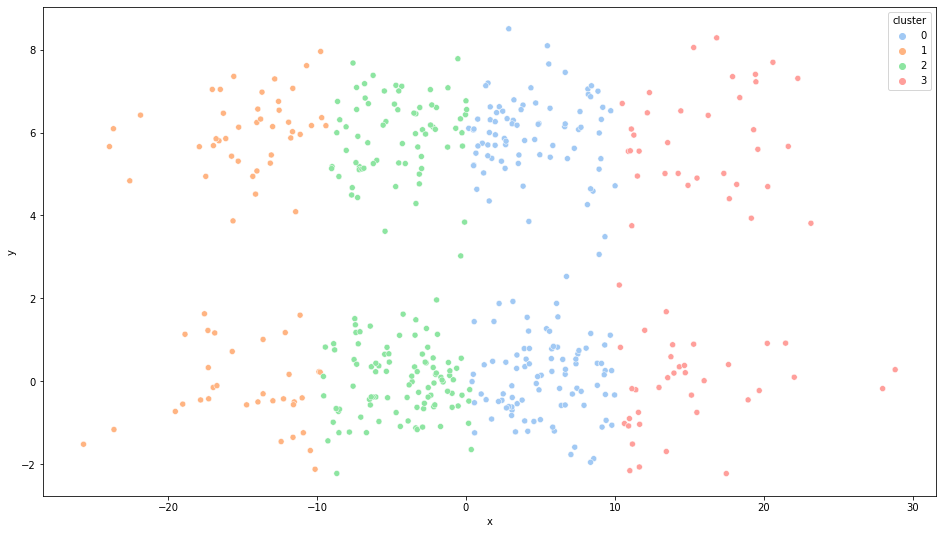

In [40]:
plt.figure(figsize=(16,9))
sns.scatterplot('x', 'y', data=cd_train, hue='cluster', palette=("pastel"))
#plt.scatter(data=cd_train_scaled, x='x', y='y', hue='cluster')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Scale:

In [41]:
cd_train_scaled, cd_validate_scaled, cd_test_scaled = scale(cd_train, cd_validate, cd_test, columns=['x','y'])

In [42]:
cd_train_scaled

,x,y,cluster
620,0.593470,0.902054,0
589,0.240995,0.816996,1
143,0.221216,0.301530,1
182,0.606755,0.246839,0
608,0.409532,0.808884,2
...,...,...,...
548,0.219897,0.857596,1
741,0.498108,0.714457,0
264,0.434661,0.225988,2
38,0.606596,0.257390,0


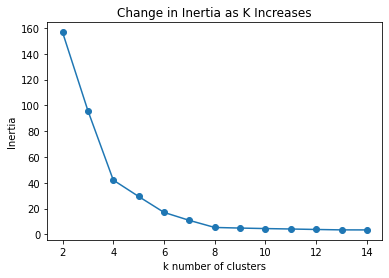

In [43]:
pd.Series(
    {k: KMeans(k).fit(cd_train_scaled).inertia_ 
     for k in range(2,15)}).plot(marker='o')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K Increases')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cd_train_scaled)
cd_train_scaled['cluster'] = kmeans.predict(cd_train_scaled)

In [45]:
kmeans.inertia_

42.0752602275369

In [46]:
cd_train_scaled

,x,y,cluster
620,0.593470,0.902054,1
589,0.240995,0.816996,3
143,0.221216,0.301530,3
182,0.606755,0.246839,1
608,0.409532,0.808884,0
...,...,...,...
548,0.219897,0.857596,3
741,0.498108,0.714457,1
264,0.434661,0.225988,0
38,0.606596,0.257390,1


In [47]:
cd_train_scaled[cd_train_scaled.cluster ==0].mean()

x          0.390089
y          0.438707
cluster    0.000000
dtype: float64

In [48]:
cd_train_scaled[cd_train_scaled.cluster ==1].mean()

x          0.560984
y          0.472313
cluster    1.000000
dtype: float64

In [49]:
cd_train_scaled[cd_train_scaled.cluster ==2].mean()

x          0.754857
y          0.467576
cluster    2.000000
dtype: float64

In [50]:
cd_train_scaled[cd_train_scaled.cluster ==3].mean()

x          0.201668
y          0.514441
cluster    3.000000
dtype: float64

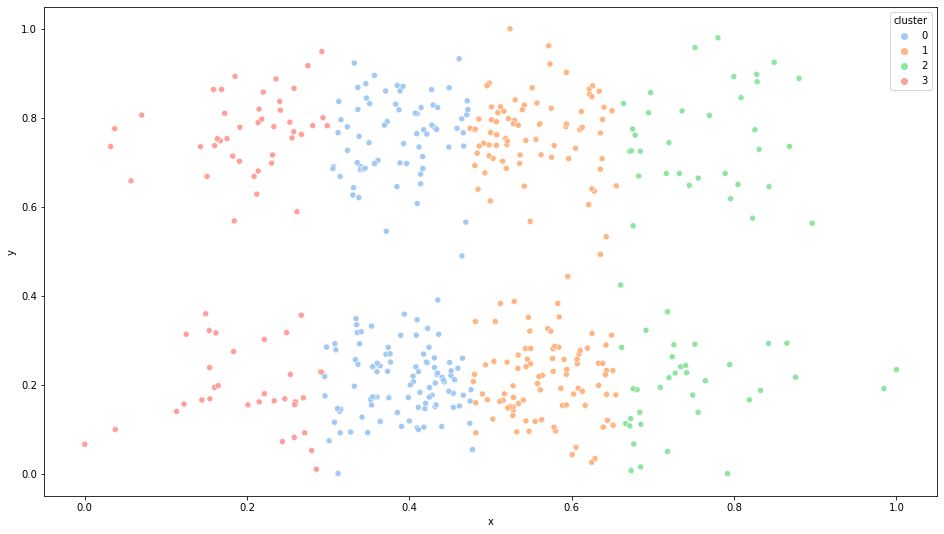

In [51]:
plt.figure(figsize=(16,9))
sns.scatterplot('x', 'y', data=cd_train_scaled, hue='cluster', palette=("pastel"))
#plt.scatter(data=cd_train_scaled, x='x', y='y', hue='cluster')
#plt.ticklabel_format(style='plain')
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()